# House Prices Prediction

## Import library & Load Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [214]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, make_scorer



In [2]:
df_train = pd.read_csv(r"train.csv")
df_test = pd .read_csv(r"test.csv")

In [3]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [5]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df_train.duplicated().sum()

0

In [10]:
categorical_cols = df_train.select_dtypes(include='object').columns
numerical_cols   = df_train.select_dtypes(exclude='object').columns


In [11]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
df_train[categorical_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [13]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
df_train[numerical_cols].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
len(categorical_cols)

43

In [16]:
len(numerical_cols)

38

## Exploratory Data Analysis (EDA)

###  Bar charts & Pie charts

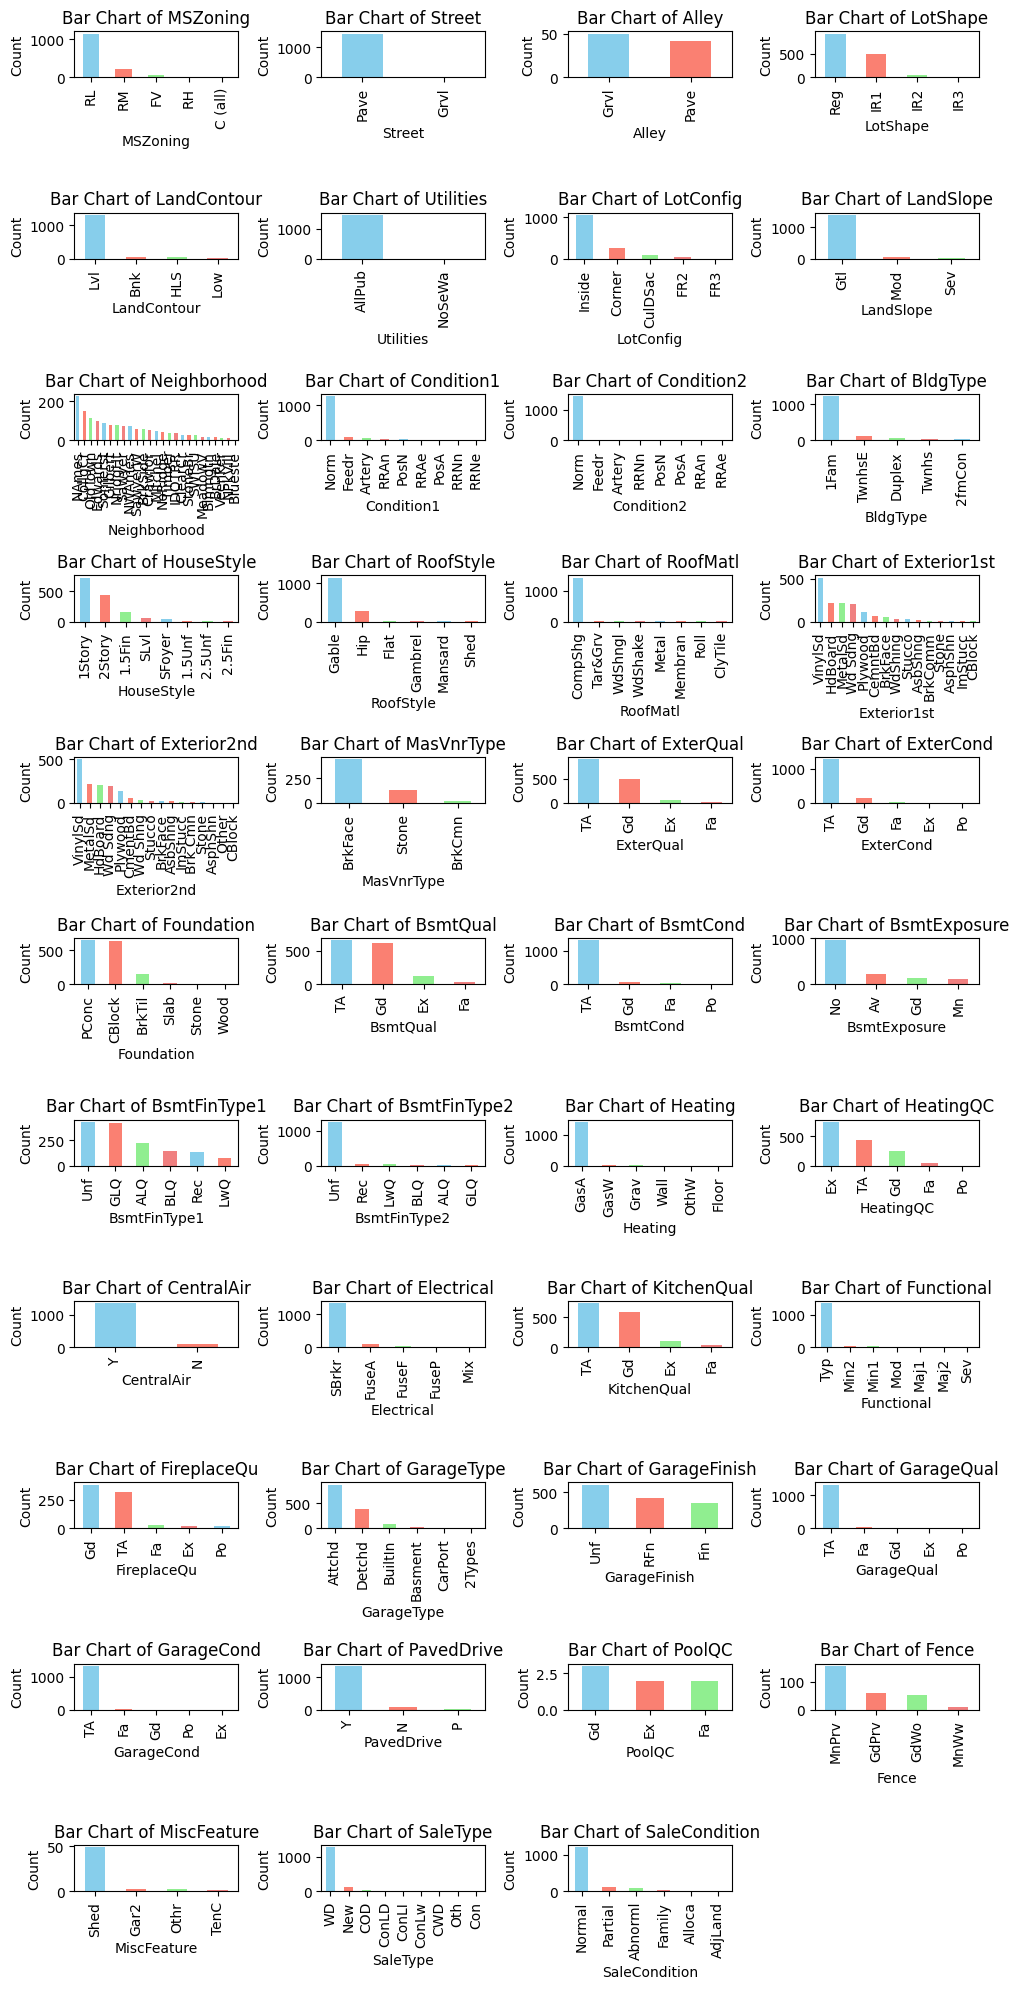

In [17]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(categorical_cols): 
    plt.subplot(11,4,i+1)
    df_train[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon','lightgreen', 'lightcoral'])
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

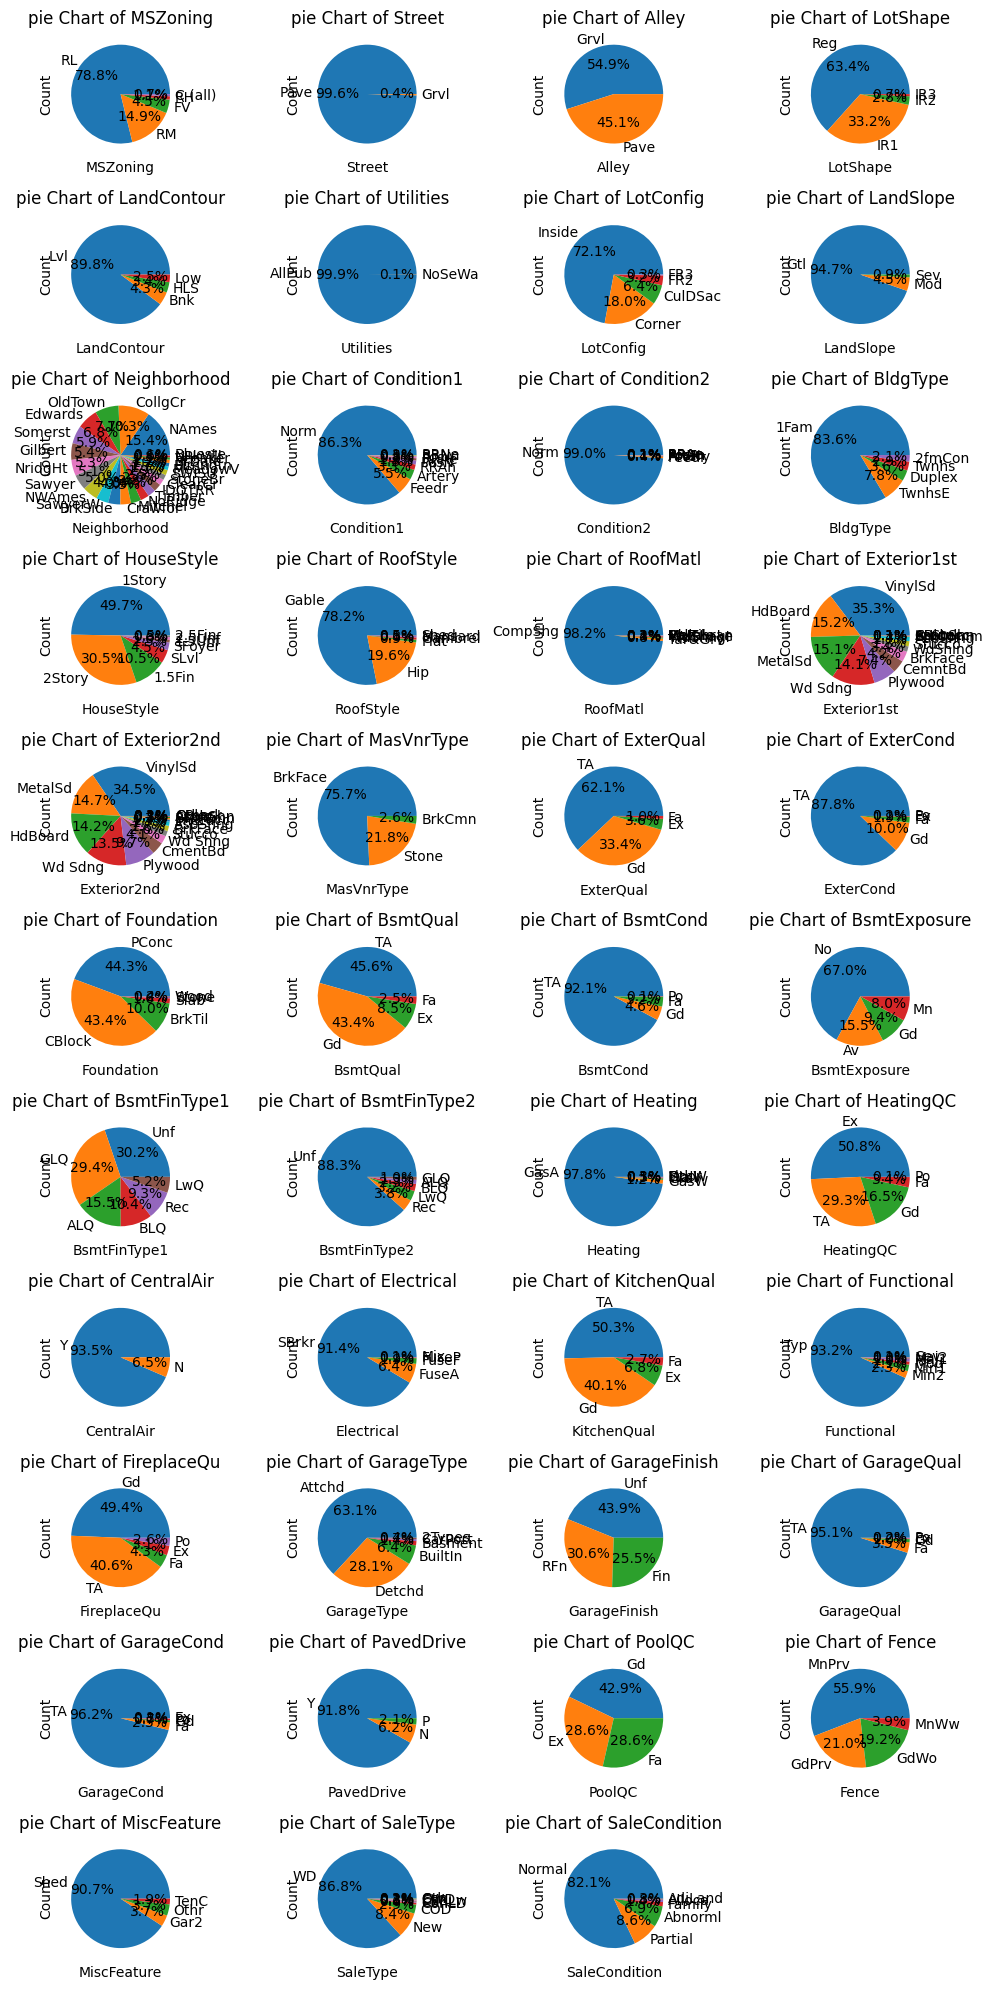

In [18]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(categorical_cols): 
    plt.subplot(11,4,i+1)
    df_train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', color=['skyblue', 'salmon','lightgreen', 'lightcoral'])
    plt.title(f"pie Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Corrlation To Top(10) Features

In [19]:
corr = df_train.corr(numeric_only=True)

In [20]:
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
top_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### Heatmap To Top(10) Features 

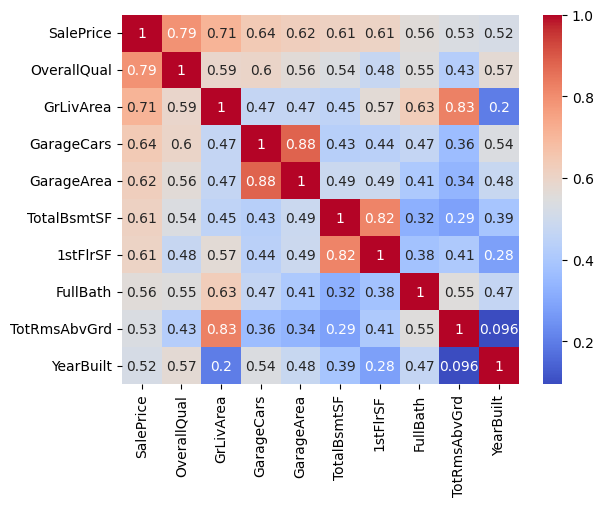

In [21]:
sns.heatmap(df_train[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.show()


###  Scatter plots by Pairplot

In [22]:
#sns.pairplot(df_train[numerical_cols],diag_kind='hist',kind='reg')
#plt.show()


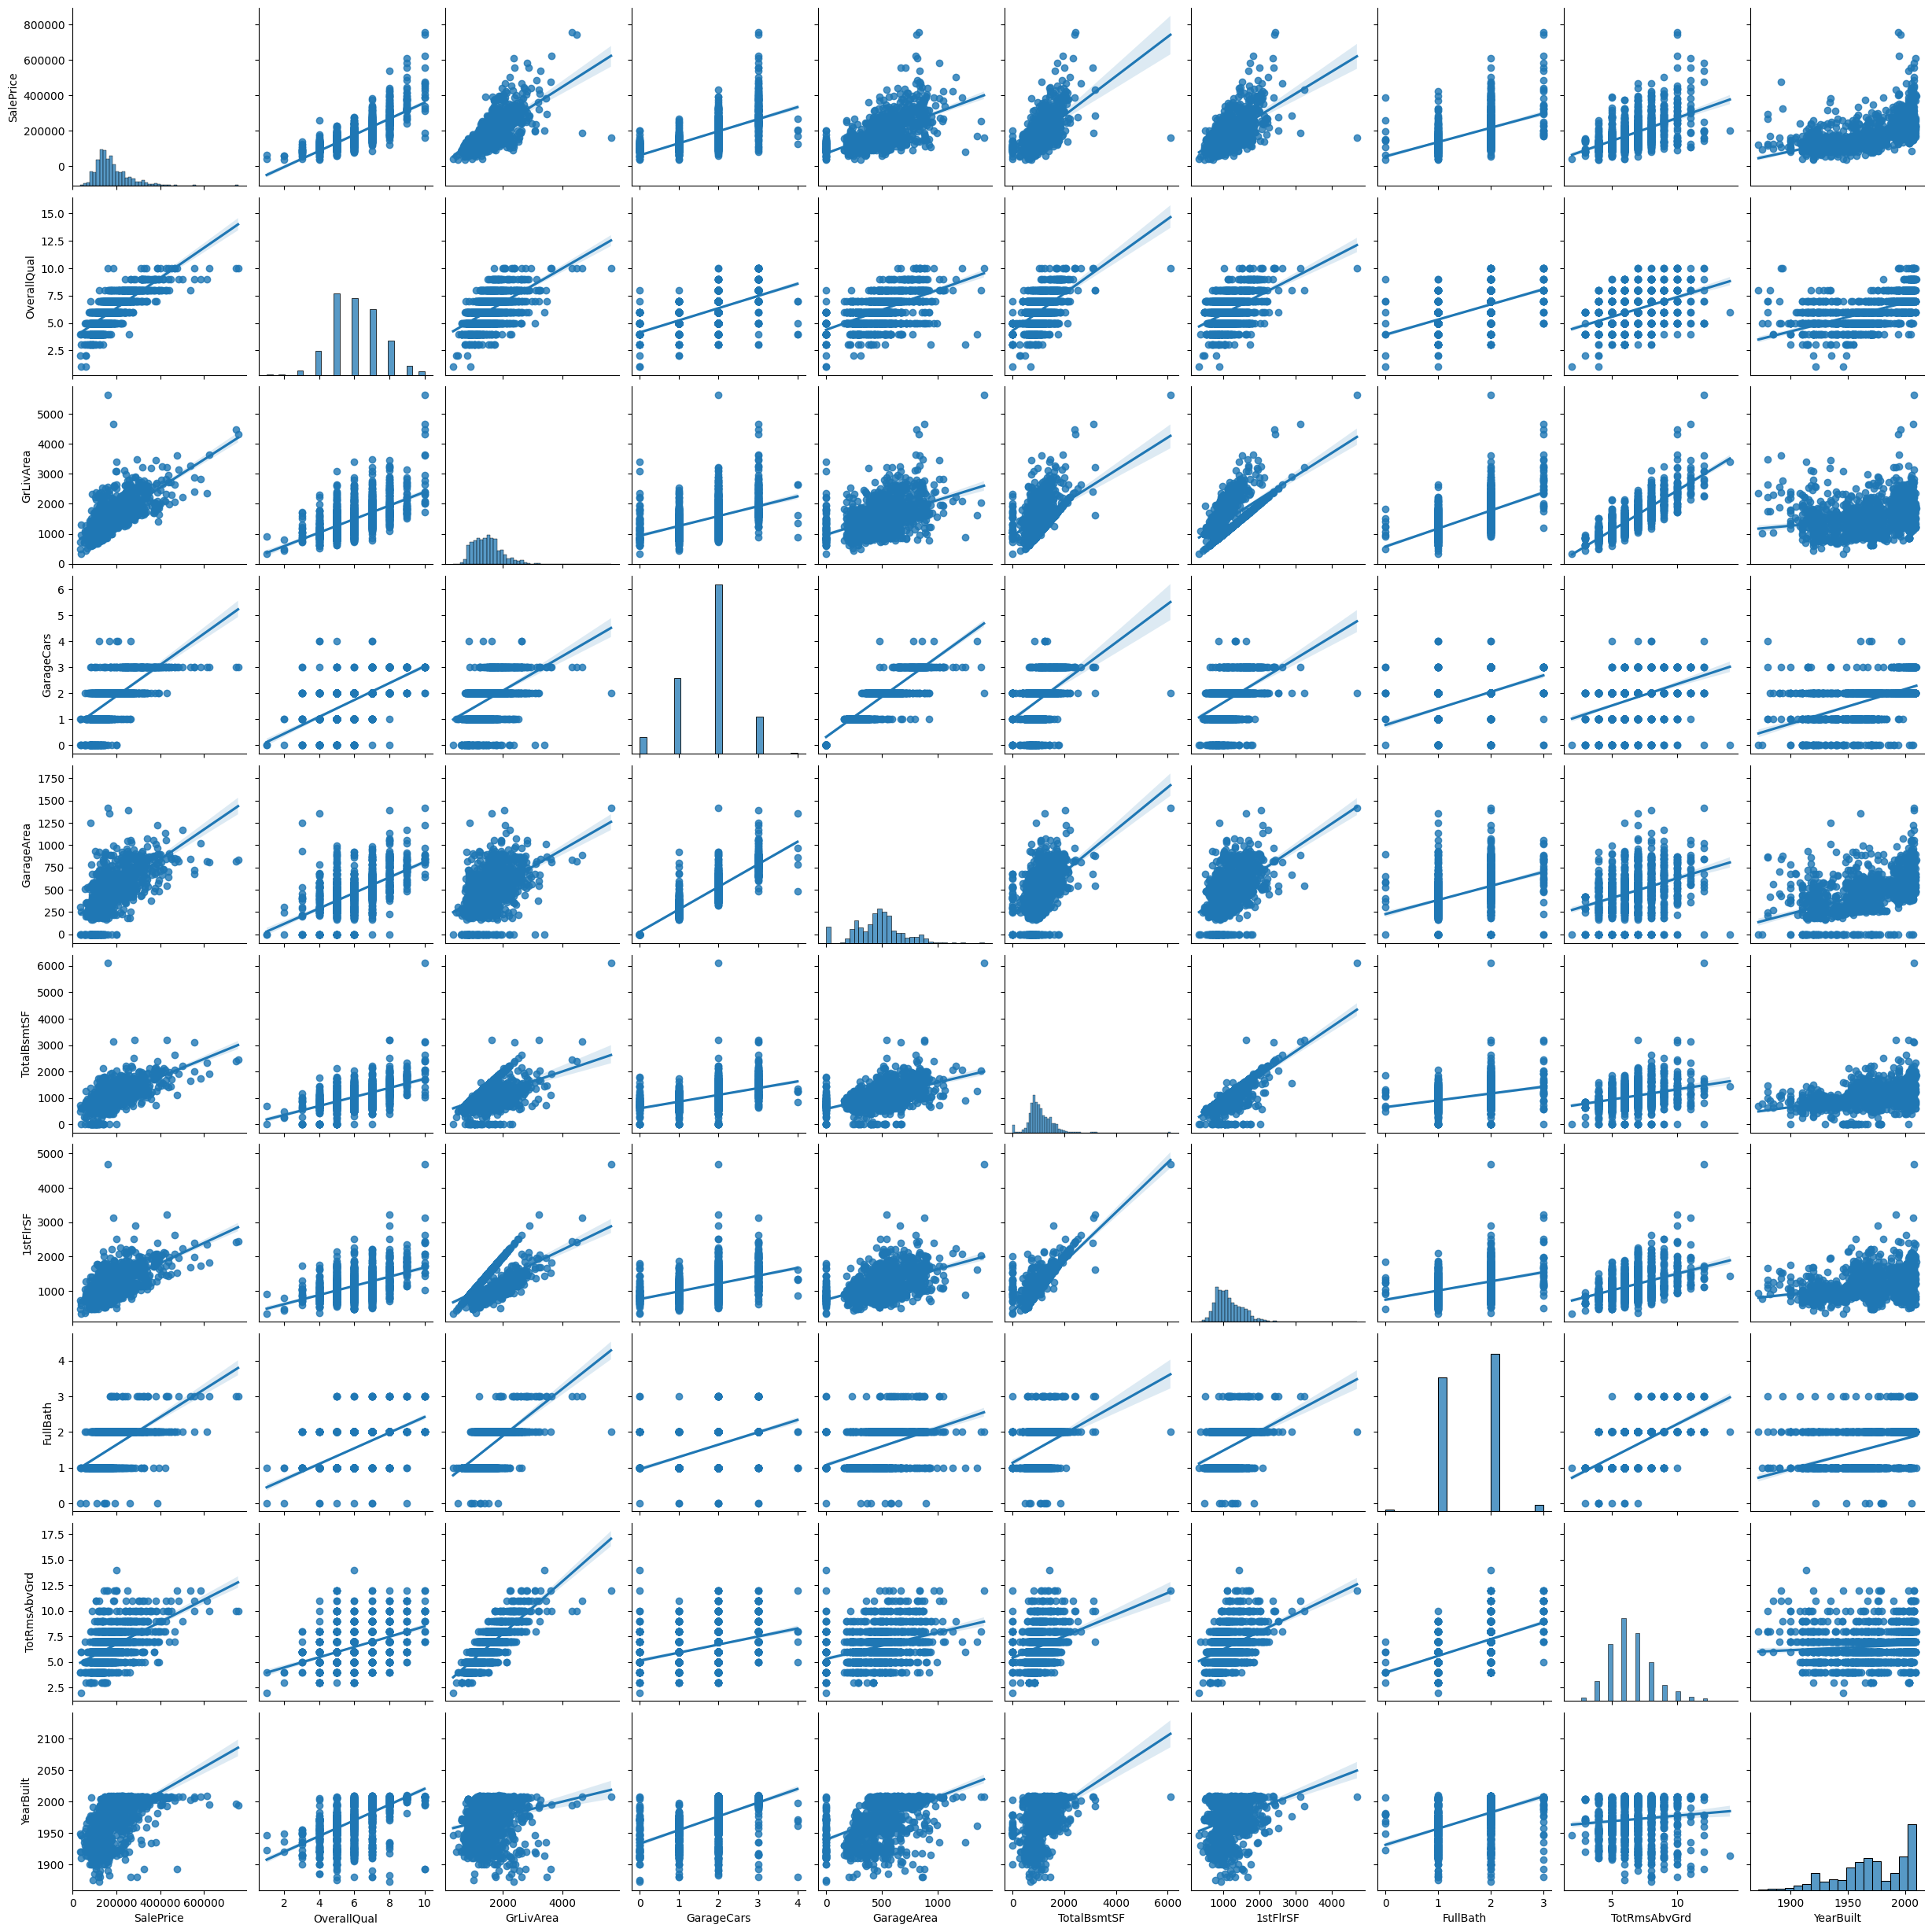

In [23]:
sns.pairplot(df_train[top_corr.index], diag_kind='hist',kind='reg')
plt.show()


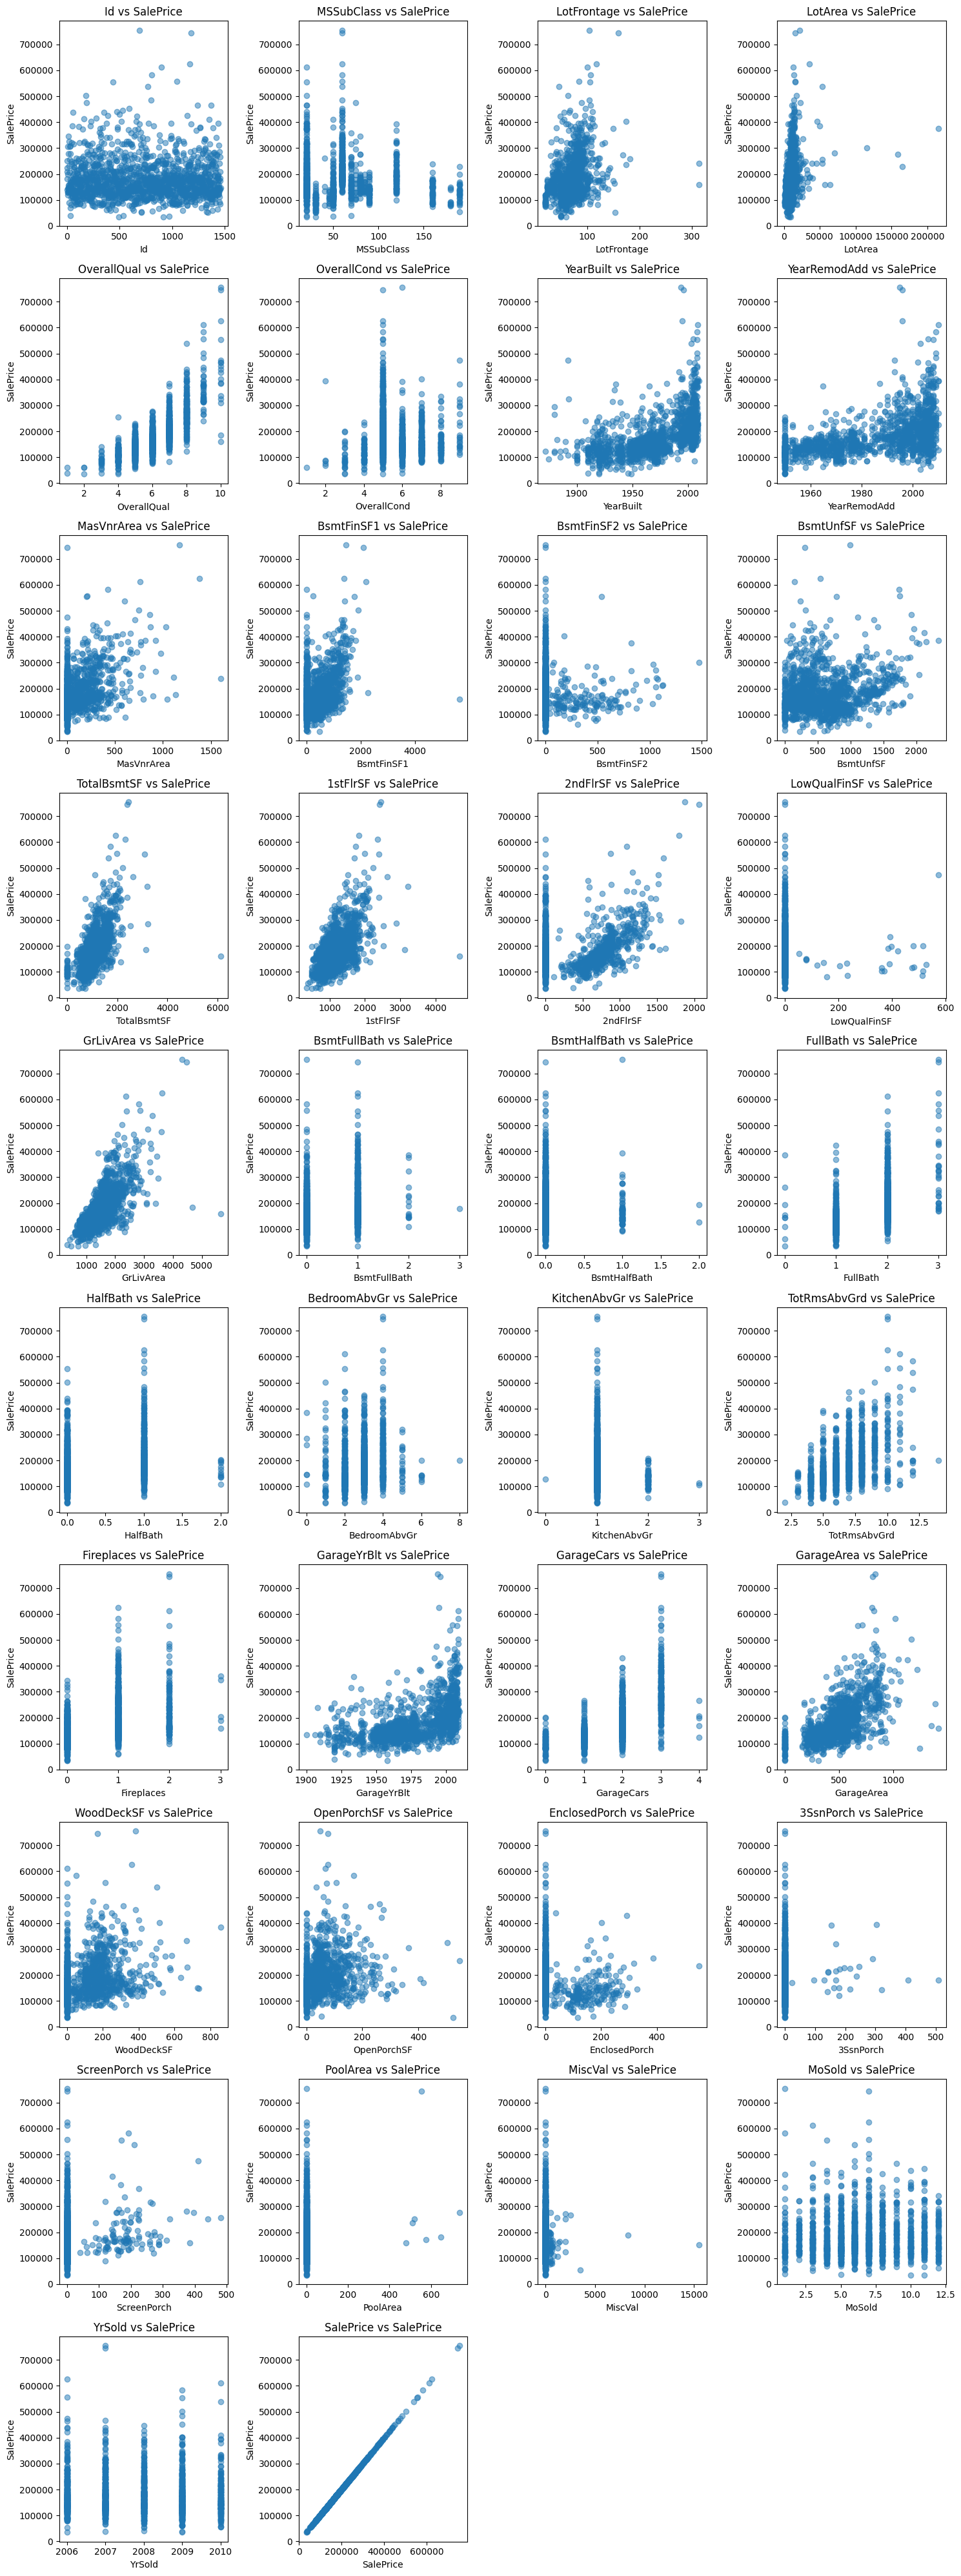

In [24]:


plt.figure(figsize=(15, 40))  

for i, col in enumerate(numerical_cols): 
    plt.subplot(10, 4, i+1)
    plt.scatter(df_train[col], df_train['SalePrice'], alpha=0.5)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

TypeError: expected 1D vector for x

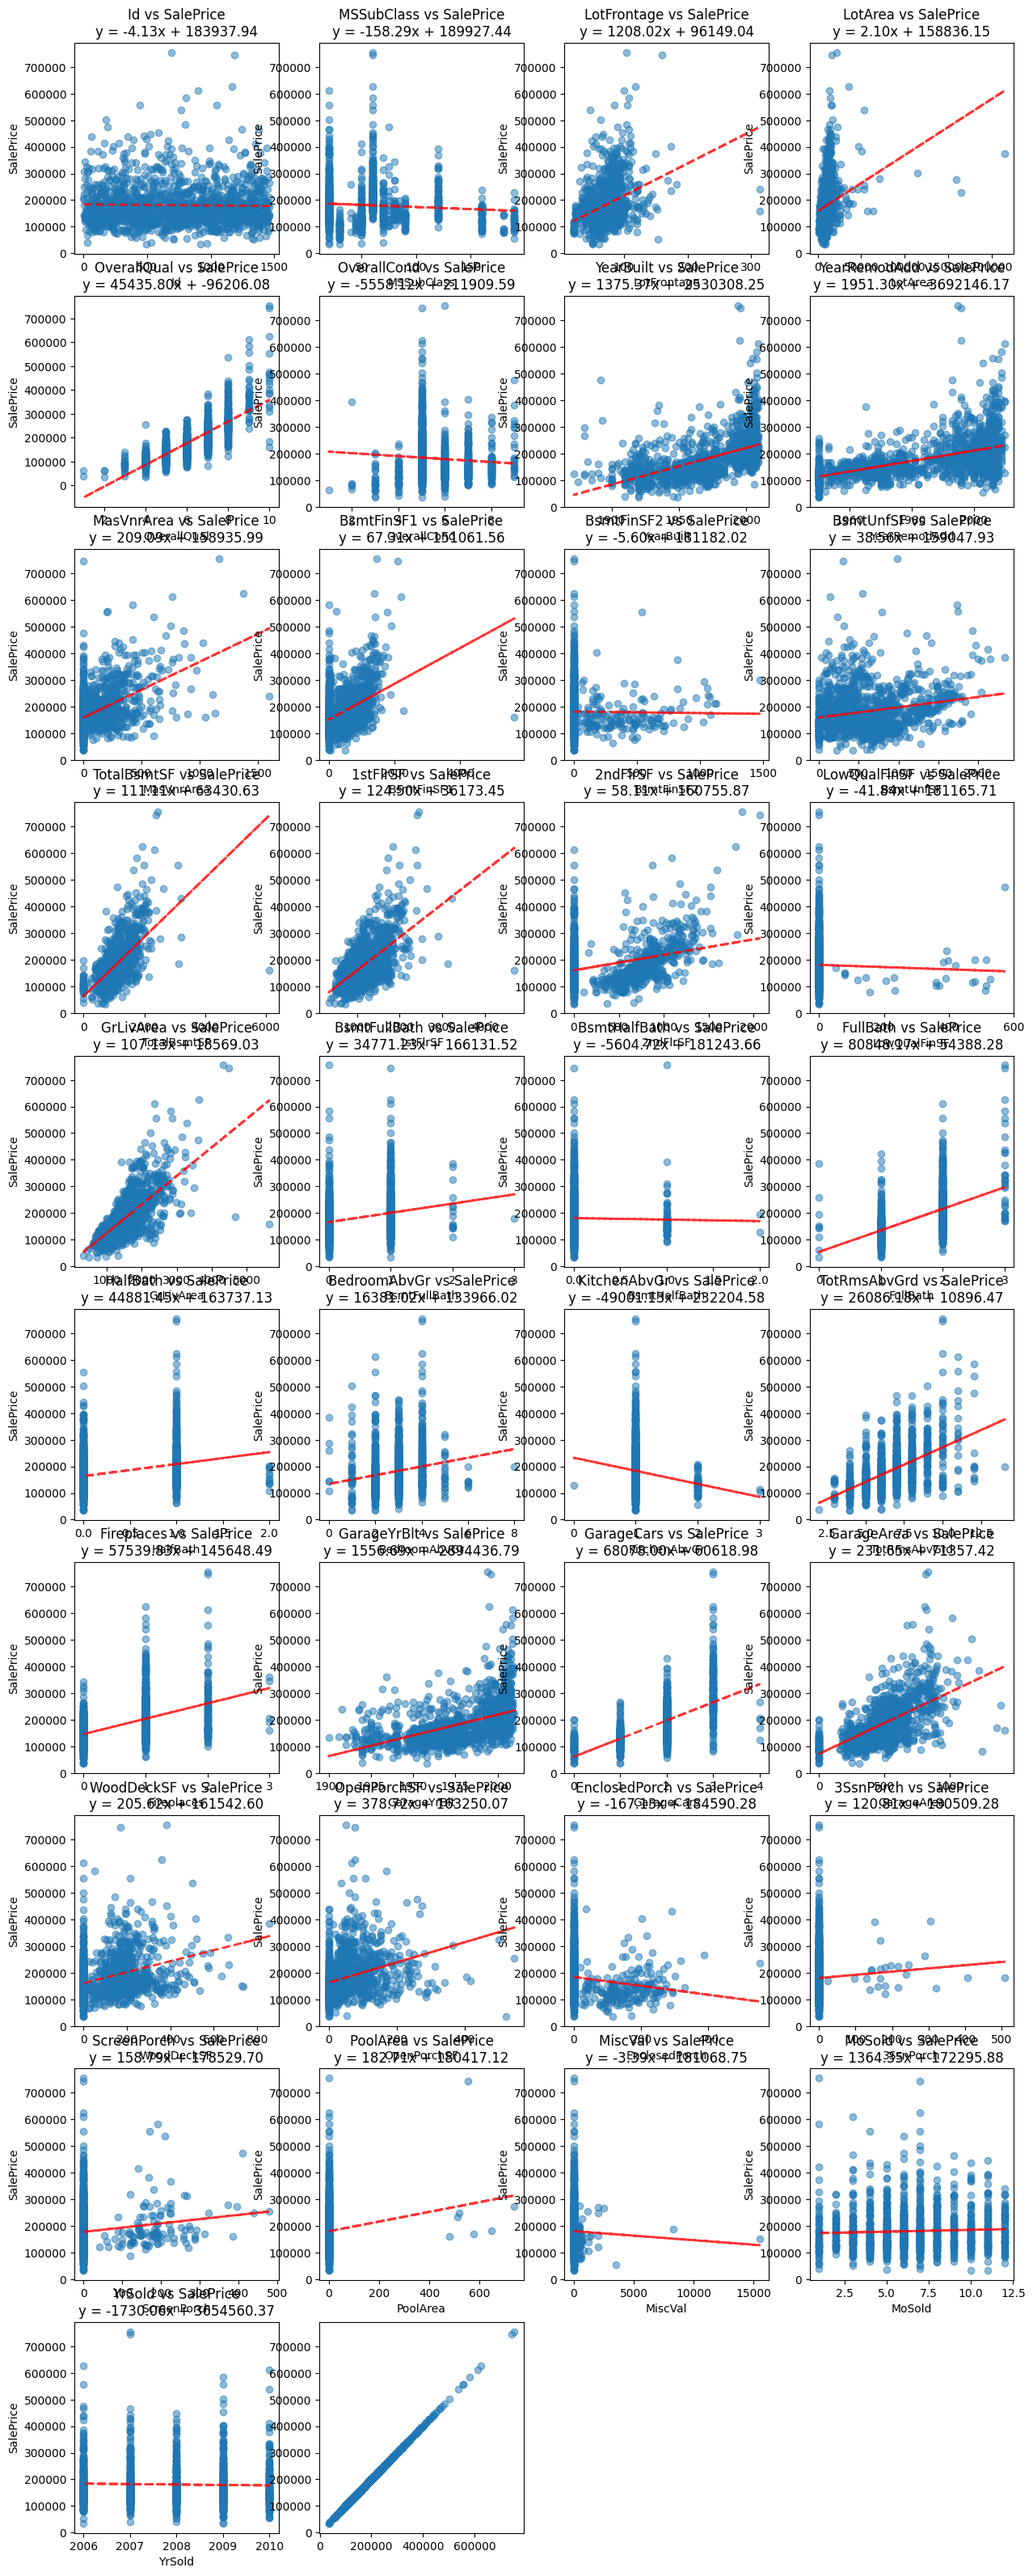

In [25]:


plt.figure(figsize=(15, 40))  

for i, col in enumerate(numerical_cols): 
    plt.subplot(10, 4, i+1)
    
    # الرسم الأساسي
    plt.scatter(df_train[col], df_train['SalePrice'], alpha=0.5)
    
    # حساب خط الاتجاه (درجة 1 = خط مستقيم)
    if not df_train[col].isnull().all() and len(df_train[col].dropna()) > 1:
        # إزالة القيم الناقصة لحساب خط الاتجاه
        valid_data = df_train[[col, 'SalePrice']].dropna()
        x = valid_data[col]
        y = valid_data['SalePrice']
        
        # حساب معادلة الخط
        z = np.polyfit(x, y, 1)  # درجة 1 = خط مستقيم
        p = np.poly1d(z)  # إنشاء دالة الخط
        
        # رسم خط الاتجاه
        plt.plot(x, p(x), "r--", linewidth=2, alpha=0.8)
        
        # إضافة معادلة الخط في العنوان
        plt.title(f'{col} vs SalePrice\ny = {z[0]:.2f}x + {z[1]:.2f}')
    else:
        plt.title(f'{col} vs SalePrice')
    
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

### Box Plots to Detect Outliers

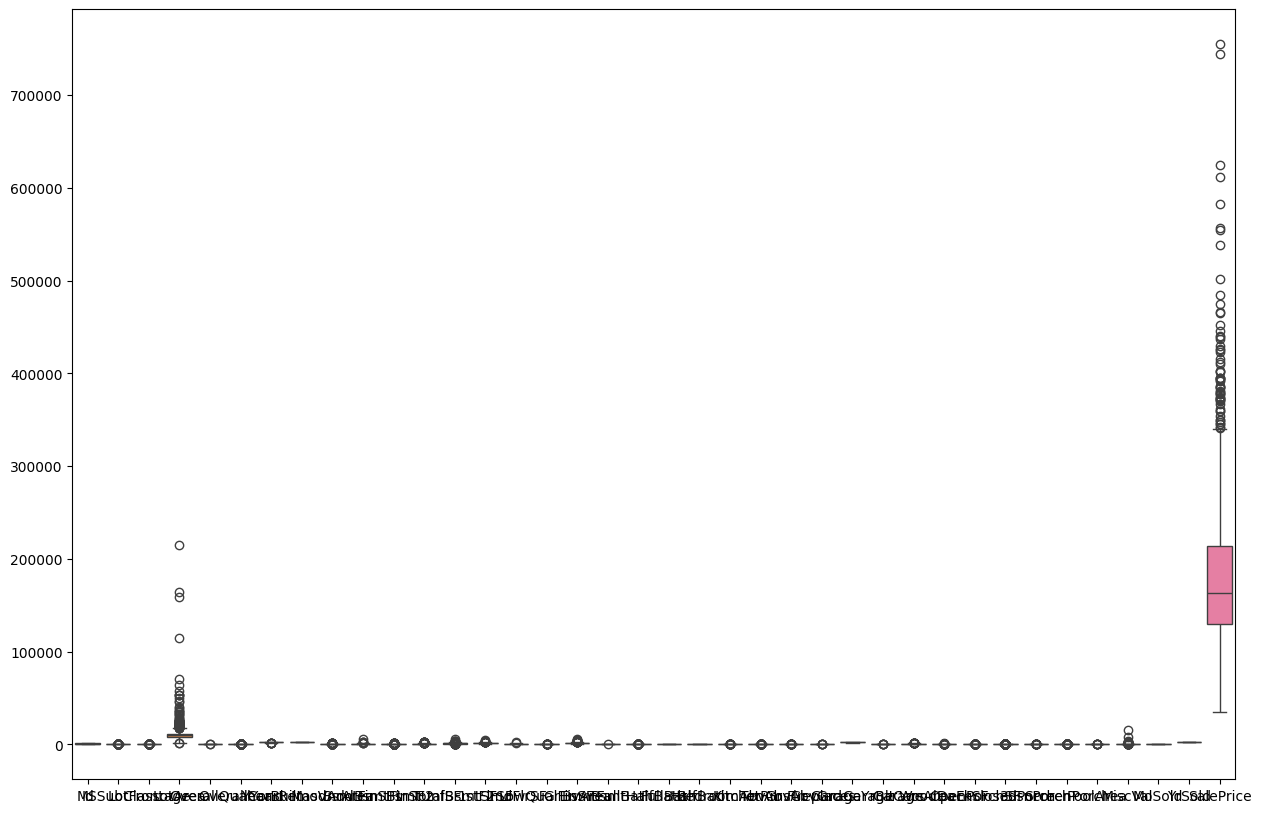

In [26]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df_train[numerical_cols])
plt.show()

### Histograms to Determine Distribution

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

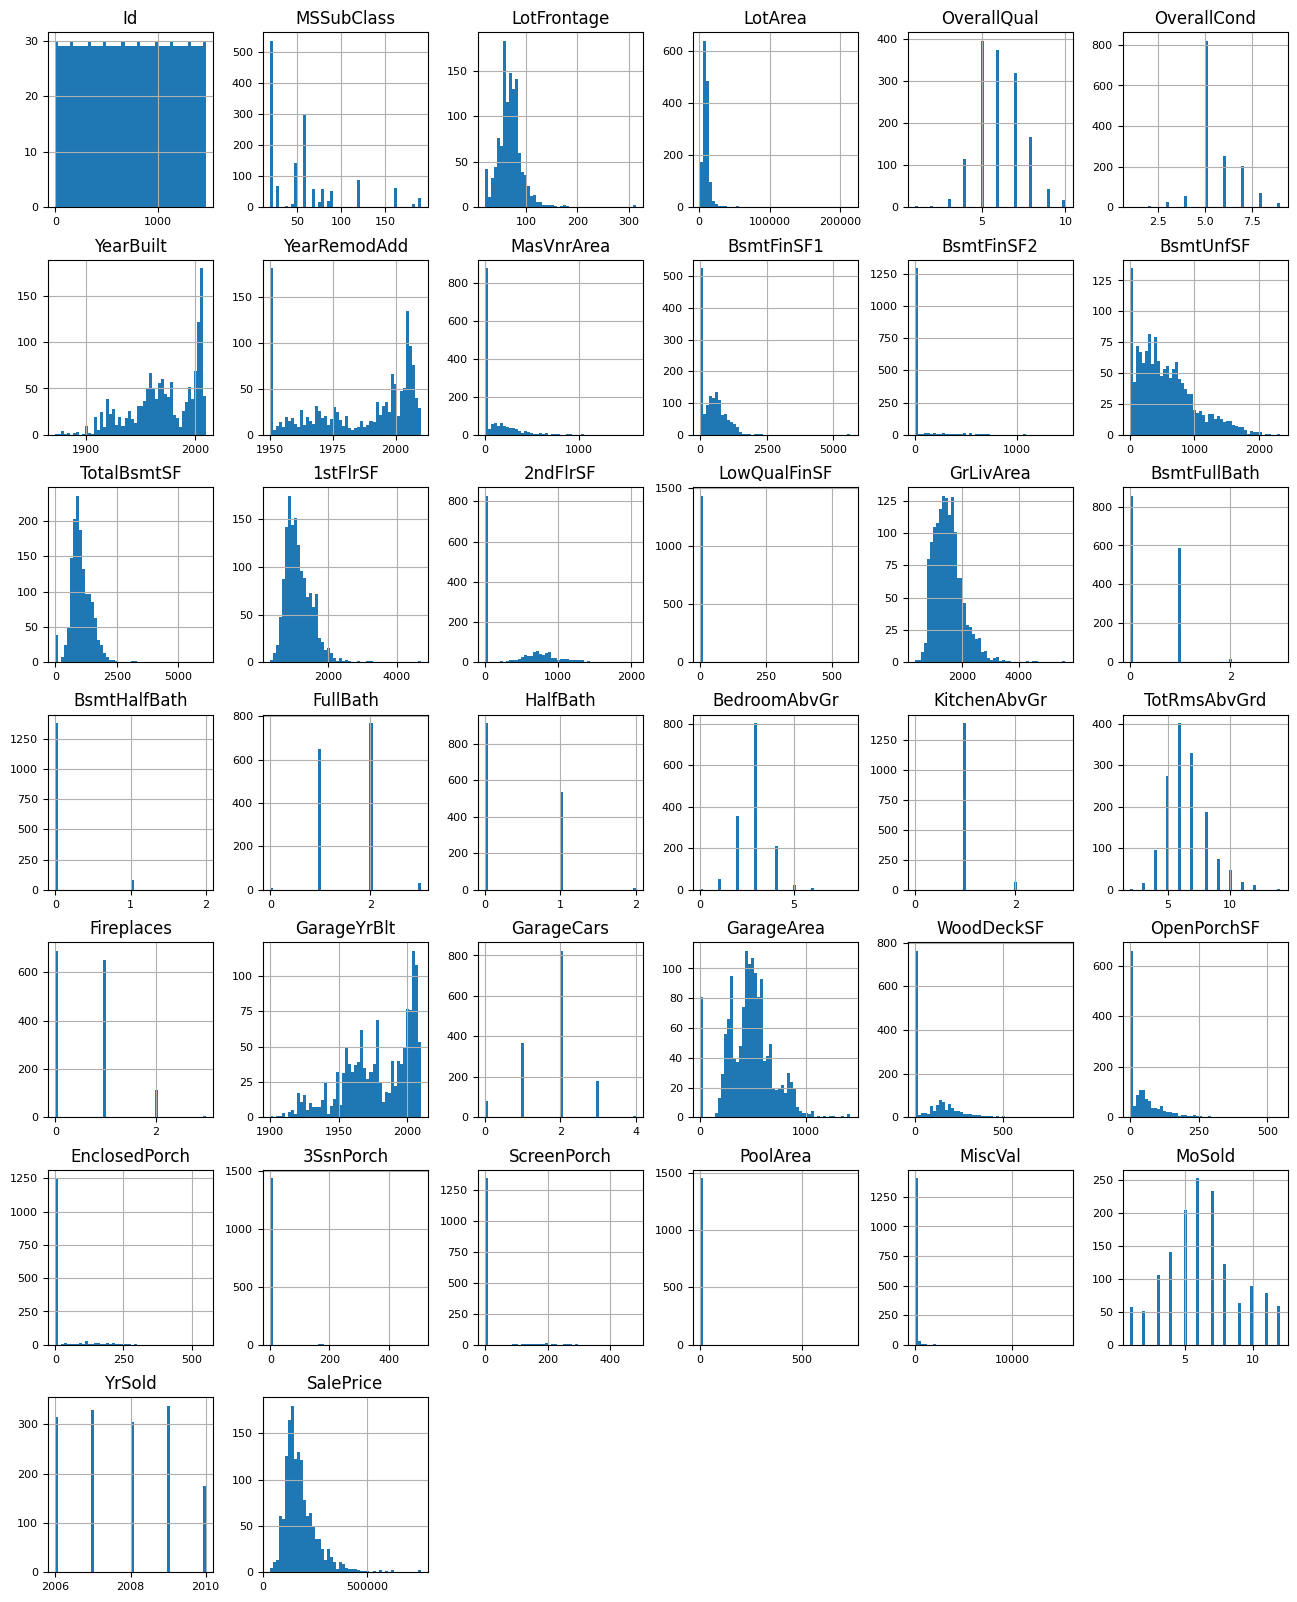

In [27]:
df_train[numerical_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


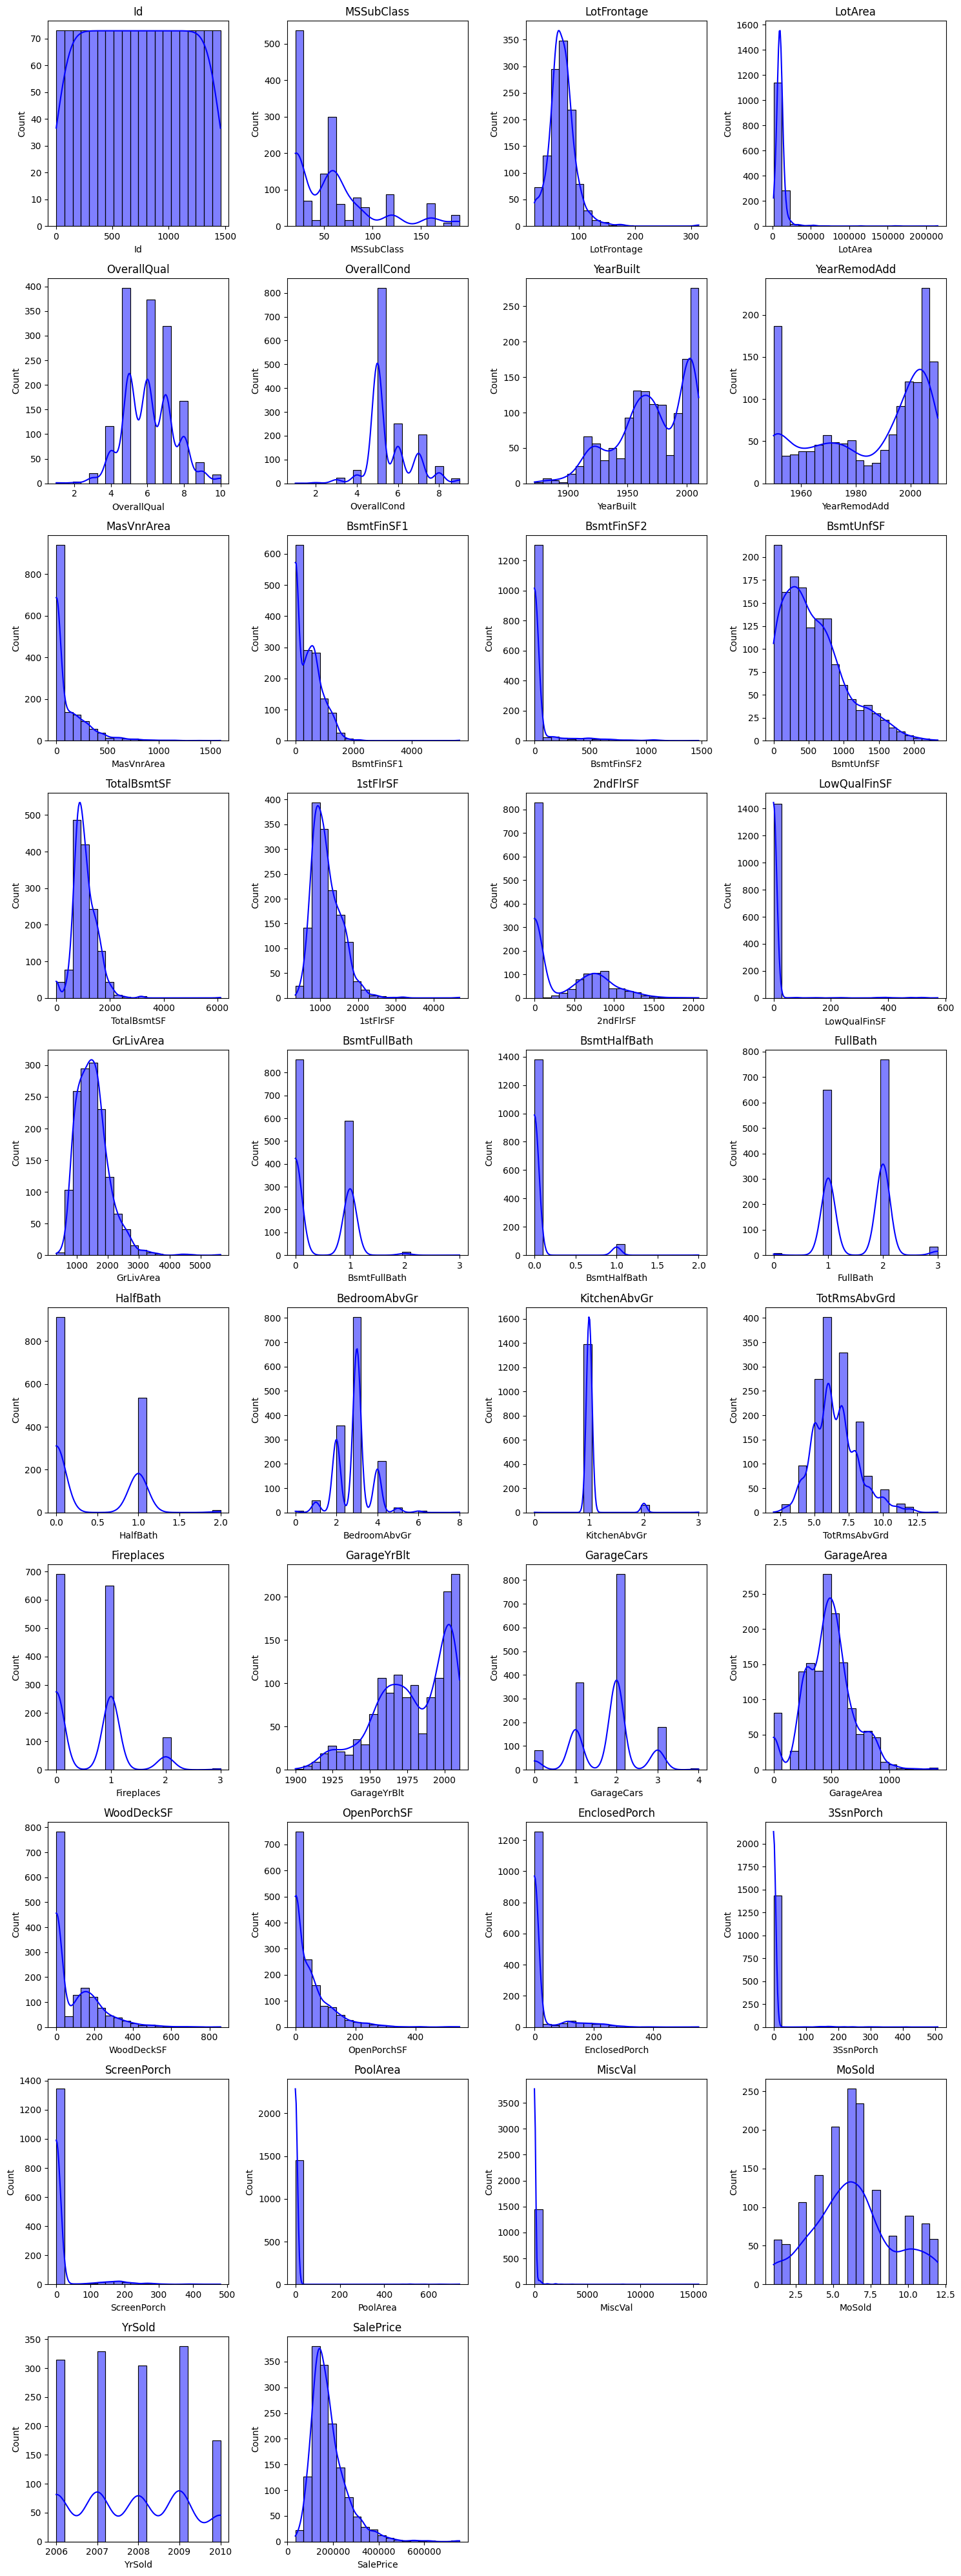

In [28]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(numerical_cols): 
    plt.subplot(10, 4, i+1)
    sns.histplot(df_train[col],bins=20,kde=True, color='blue')
    plt.title(col)

plt.tight_layout()
plt.show()

## Cleaning 

In [29]:
df_train.shape

(1460, 81)

In [30]:
missing = df_train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [31]:
missing = df_test.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [32]:
df_train['Electrical'].isnull().sum()

1

In [33]:
df_test['Electrical'].isnull().sum()

0

In [34]:
mode_Electrical=df_train["Electrical"].mode()[0]

df_train['Electrical'].fillna(mode_Electrical,inplace=True)
df_test['Electrical'].fillna(mode_Electrical,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1242636103.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Electrical'].fillna(mode_Electrical,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1242636103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [35]:
df_train['Electrical'].isnull().sum()

0

In [36]:
df_train['MasVnrArea'].isnull().sum()

8

In [37]:
df_test['MasVnrArea'].isnull().sum()

15

In [38]:
median_MasVnrArea=df_train['MasVnrArea'].median()

df_train['MasVnrArea'].fillna(median_MasVnrArea,inplace=True)
df_test['MasVnrArea'].fillna(median_MasVnrArea,inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1680503808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrArea'].fillna(median_MasVnrArea,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1680503808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [39]:
df_train['MasVnrArea'].isnull().sum()

0

In [40]:
df_test['MasVnrArea'].isnull().sum()

0

In [41]:
df_train['BsmtQual'].isnull().sum()

37

In [42]:
df_test['BsmtQual'].isnull().sum()

44

In [43]:
df_train['BsmtQual'].fillna('None',inplace=True)
df_test['BsmtQual'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1061639566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtQual'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1061639566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [44]:
df_train['BsmtQual'].isnull().sum()

0

In [45]:
df_test['BsmtQual'].isnull().sum()

0

In [46]:
df_train['BsmtCond'].isnull().sum()

37

In [47]:
df_test['BsmtCond'].isnull().sum()

45

In [48]:
df_train['BsmtCond'].fillna('None',inplace=True)
df_test['BsmtCond'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3291768213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtCond'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3291768213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [49]:
df_train['BsmtCond'].isnull().sum()

0

In [50]:
df_test['BsmtCond'].isnull().sum()

0

In [51]:
df_train['BsmtFinType1'].isnull().sum()

37

In [52]:
df_test['BsmtFinType1'].isnull().sum()

42

In [53]:
df_train['BsmtFinType1'].fillna('None',inplace=True)
df_test['BsmtFinType1'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1981475031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtFinType1'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1981475031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [54]:
df_train['BsmtFinType1'].isnull().sum()

0

In [55]:
df_test['BsmtFinType1'].isnull().sum()

0

In [56]:
df_train['BsmtExposure'].isnull().sum()

38

In [57]:
df_test['BsmtExposure'].isnull().sum()

44

In [58]:
df_train['BsmtExposure'].fillna('None',inplace=True)
df_test['BsmtExposure'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2320521019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtExposure'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2320521019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [59]:
df_train['BsmtExposure'].isnull().sum()

0

In [60]:
df_test['BsmtExposure'].isnull().sum()

0

In [61]:
df_train['BsmtFinType2'].isnull().sum()

38

In [62]:
df_test['BsmtFinType2'].isnull().sum()

42

In [63]:
df_train['BsmtFinType2'].fillna('None',inplace=True)
df_test['BsmtFinType2'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2695692091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtFinType2'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2695692091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [64]:
df_train['BsmtFinType2'].isnull().sum()

0

In [65]:
df_test['BsmtFinType2'].isnull().sum()

0

In [66]:
df_train['GarageCond'].isnull().sum()

81

In [67]:
df_test['GarageCond'].isnull().sum()

78

In [68]:
df_train['GarageCond'].fillna('None',inplace=True)
df_test['GarageCond'].fillna('None',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\363065484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageCond'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\363065484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [69]:
df_train['GarageCond'].isnull().sum()

0

In [70]:
df_test['GarageCond'].isnull().sum()

0

In [71]:
df_train['GarageType'].isnull().sum()

81

In [72]:
df_test['GarageType'].isnull().sum()

76

In [73]:
df_train['GarageType'].fillna('None',inplace=True)
df_test['GarageType'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\153114757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageType'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\153114757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [74]:
df_train['GarageType'].isnull().sum()

0

In [75]:
df_test['GarageType'].isnull().sum()

0

In [76]:
df_train['GarageQual'].isnull().sum()

81

In [77]:
df_test['GarageQual'].isnull().sum()

78

In [78]:
df_train['GarageQual'].fillna('None',inplace=True)
df_test['GarageQual'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2665821676.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageQual'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2665821676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [79]:
df_train['GarageQual'].isnull().sum()

0

In [80]:
df_test['GarageQual'].isnull().sum()

0

In [81]:
df_train['GarageFinish'].isnull().sum()

81

In [82]:
df_test['GarageFinish'].isnull().sum()

78

In [83]:
df_train['GarageFinish'].fillna('None',inplace=True)
df_test['GarageFinish'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2802293131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageFinish'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2802293131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [84]:
df_train['GarageFinish'].isnull().sum()

0

In [85]:
df_test['GarageFinish'].isnull().sum()

0

In [86]:
df_train['GarageYrBlt'].isnull().sum()

81

In [87]:
df_test['GarageYrBlt'].isnull().sum()

78

In [88]:
df_train['GarageYrBlt'].fillna(0,inplace=True)
df_test['GarageYrBlt'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3449454388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageYrBlt'].fillna(0,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3449454388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [89]:
df_train['GarageYrBlt'].isnull().sum()

0

In [90]:
df_test['GarageYrBlt'].isnull().sum()

0

In [91]:
df_train['LotFrontage'].isnull().sum()

259

In [92]:
df_test['LotFrontage'].isnull().sum()

227

In [93]:
median_LotFrontage=df_train['LotFrontage'].median()

df_train['LotFrontage'].fillna(median_LotFrontage,inplace=True)
df_test['LotFrontage'].fillna(median_LotFrontage,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1787227420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(median_LotFrontage,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1787227420.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [94]:
df_train['LotFrontage'].isnull().sum()

0

In [95]:
df_test['LotFrontage'].isnull().sum()

0

In [96]:
df_train['FireplaceQu'].head(15)

0     NaN
1      TA
2      TA
3      Gd
4      TA
5     NaN
6      Gd
7      TA
8      TA
9      TA
10    NaN
11     Gd
12    NaN
13     Gd
14     Fa
Name: FireplaceQu, dtype: object

In [97]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [98]:
df_train['FireplaceQu'].isnull().sum()

690

In [99]:
df_test['FireplaceQu'].isnull().sum()

730

In [100]:
df_train['FireplaceQu'].fillna('None',inplace=True)
df_test['FireplaceQu'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1727946340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FireplaceQu'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1727946340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [101]:
df_train['FireplaceQu'].isnull().sum()

0

In [102]:
df_test['FireplaceQu'].isnull().sum()

0

In [103]:
df_train['MasVnrType'].isnull().sum()

872

In [104]:
df_test['MasVnrType'].isnull().sum()

894

In [105]:
mode_MasVnrType=df_train['MasVnrType'].mode()[0]
df_train['MasVnrType'].fillna(mode_MasVnrType,inplace=True)
df_test['MasVnrType'].fillna(mode_MasVnrType,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3503764499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrType'].fillna(mode_MasVnrType,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3503764499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [106]:
df_train['MasVnrType'].isnull().sum()

0

In [107]:
df_test['MasVnrType'].isnull().sum()

0

In [108]:
df_train['Fence'].isnull().sum()

1179

In [109]:
df_test['Fence'].isnull().sum()

1169

In [110]:
df_train['Fence'].fillna('None',inplace=True)
df_test['Fence'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1561152804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Fence'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1561152804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [111]:
df_train['Fence'].isnull().sum()

0

In [112]:
df_test['Fence'].isnull().sum()

0

In [113]:
df_train['Alley'].isnull().sum()

1369

In [114]:
df_test['Alley'].isnull().sum()

1352

In [115]:
df_train['Alley'].fillna('None',inplace=True)
df_test['Alley'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\602741538.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Alley'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\602741538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [116]:
df_train['Alley'].isnull().sum()

0

In [117]:
df_test['Alley'].isnull().sum()

0

In [118]:
df_train['MiscFeature'].isnull().sum()

1406

In [119]:
df_test['MiscFeature'].isnull().sum()

1408

In [120]:
df_train['MiscFeature'].fillna('None',inplace=True)
df_test['MiscFeature'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3460997814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MiscFeature'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3460997814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [121]:
df_train['MiscFeature'].isnull().sum()

0

In [122]:
df_test['MiscFeature'].isnull().sum()

0

In [123]:
df_train['PoolQC'].isnull().sum()

1453

In [124]:
df_test['PoolQC'].isnull().sum()

1456

In [125]:
df_train['PoolQC'].fillna('None',inplace=True)
df_test['PoolQC'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\4081846887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['PoolQC'].fillna('None',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\4081846887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [126]:
df_train['PoolQC'].isnull().sum()

0

In [127]:
df_test['PoolQC'].isnull().sum()

0

In [129]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]


MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [130]:
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2157668774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace=True)


In [131]:
df_test['Utilities'].fillna('None',inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\277775456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Utilities'].fillna('None',inplace=True)


In [132]:
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2882855645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0],inplace=True)


In [133]:
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1741000190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0],inplace=True)


In [134]:
df_test['SaleType'].value_counts()

SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [135]:
df_test['BsmtFinSF1'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2112875875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtFinSF1'].fillna(0,inplace=True)


In [136]:
df_test['BsmtFinSF2'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3527567669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtFinSF2'].fillna(0,inplace=True)


In [137]:
df_test['BsmtUnfSF'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1337466911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtUnfSF'].fillna(0,inplace=True)


In [138]:
df_test['TotalBsmtSF'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\228424381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['TotalBsmtSF'].fillna(0,inplace=True)


In [139]:
df_test['BsmtFullBath'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\2672830178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtFullBath'].fillna(0,inplace=True)


In [140]:
df_test['BsmtHalfBath'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1154927492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['BsmtHalfBath'].fillna(0,inplace=True)


In [141]:
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3834148968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0],inplace=True)


In [142]:
df_test['Functional'].fillna(df_test['Functional'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3565868116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Functional'].fillna(df_test['Functional'].mode()[0],inplace=True)


In [143]:
df_test['GarageCars'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\1580713332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GarageCars'].fillna(0,inplace=True)


In [144]:
df_test['GarageArea'].fillna(0,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\3815208372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['GarageArea'].fillna(0,inplace=True)


In [145]:
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11268\382447656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace=True)


In [146]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]


Series([], dtype: int64)

## Outliers & Skewness

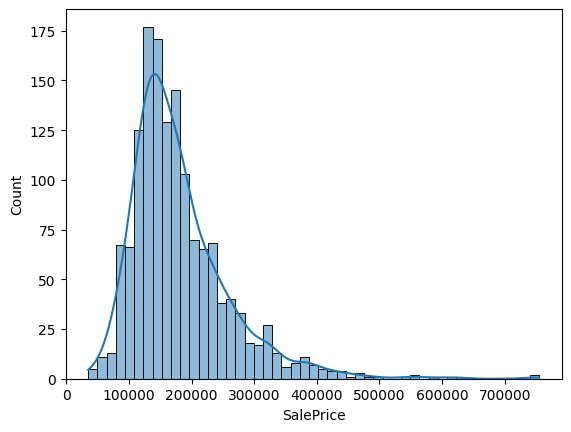

In [147]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.show()


In [148]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


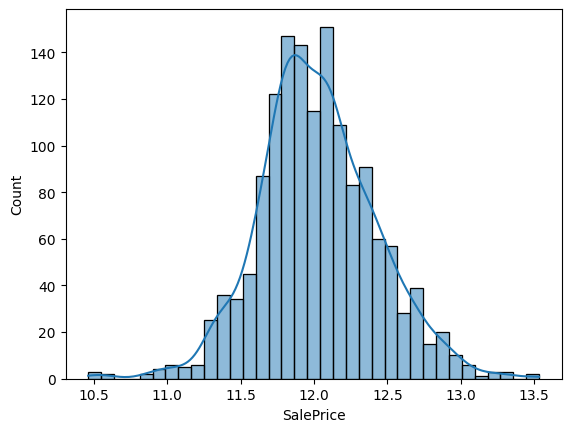

In [149]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.show()


In [150]:
log_cols = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal'
]


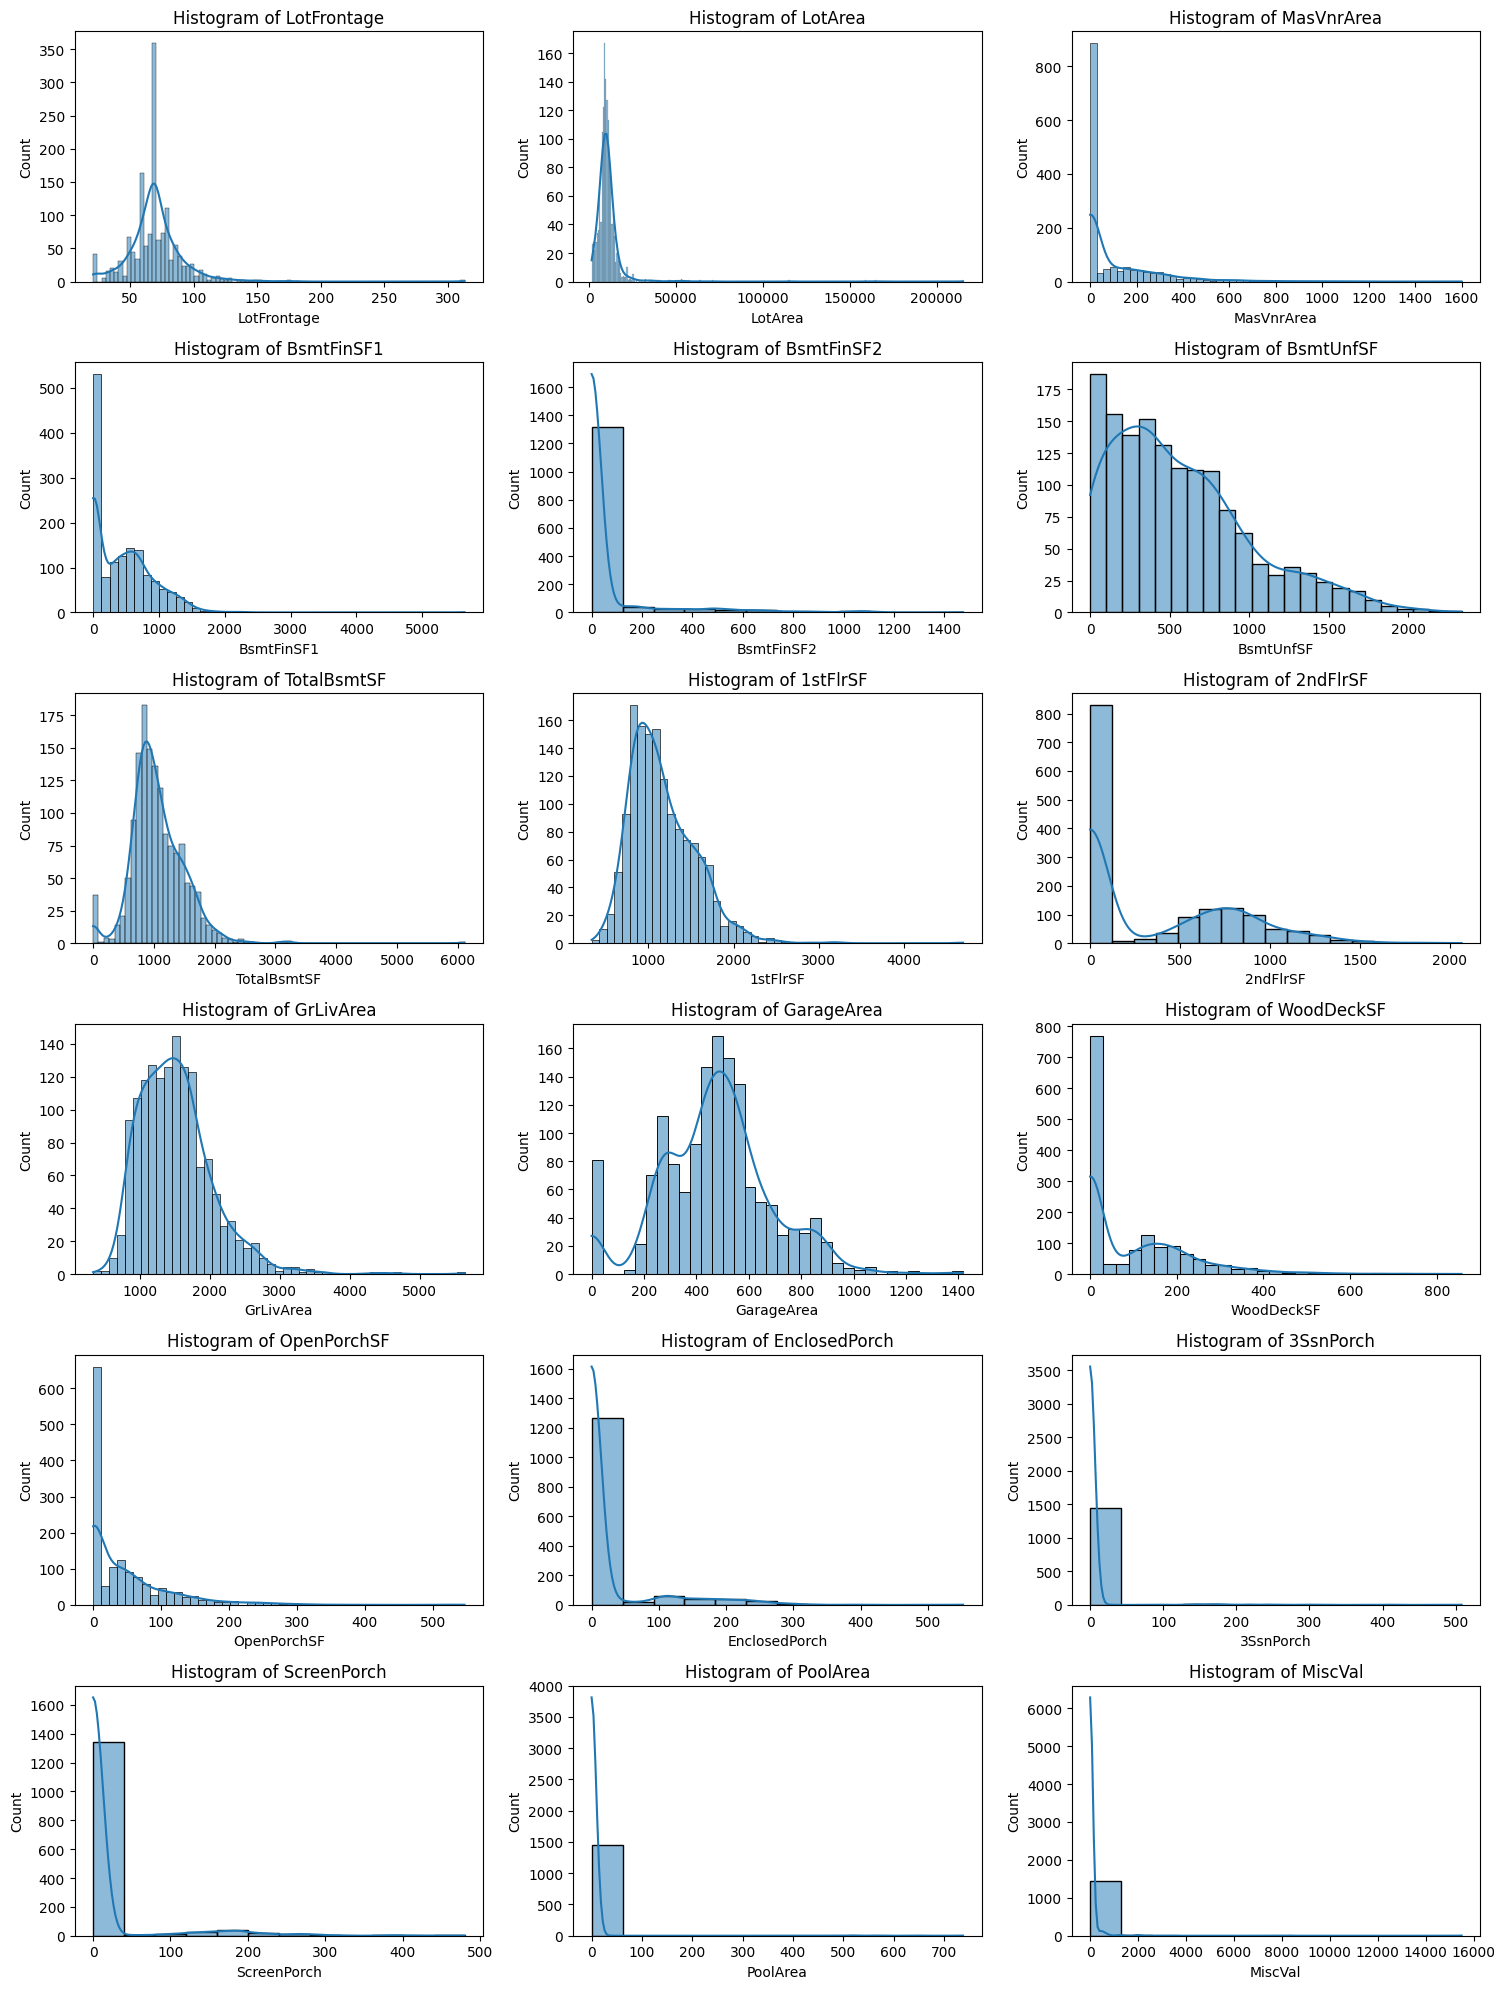

In [151]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(log_cols): 
    plt.subplot(6,3,i+1)
    sns.histplot(df_train[col], kde=True)

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [152]:
for col in log_cols:
    df_train[col] = np.log1p(df_train[col])
    df_test[col]  = np.log1p(df_test[col])


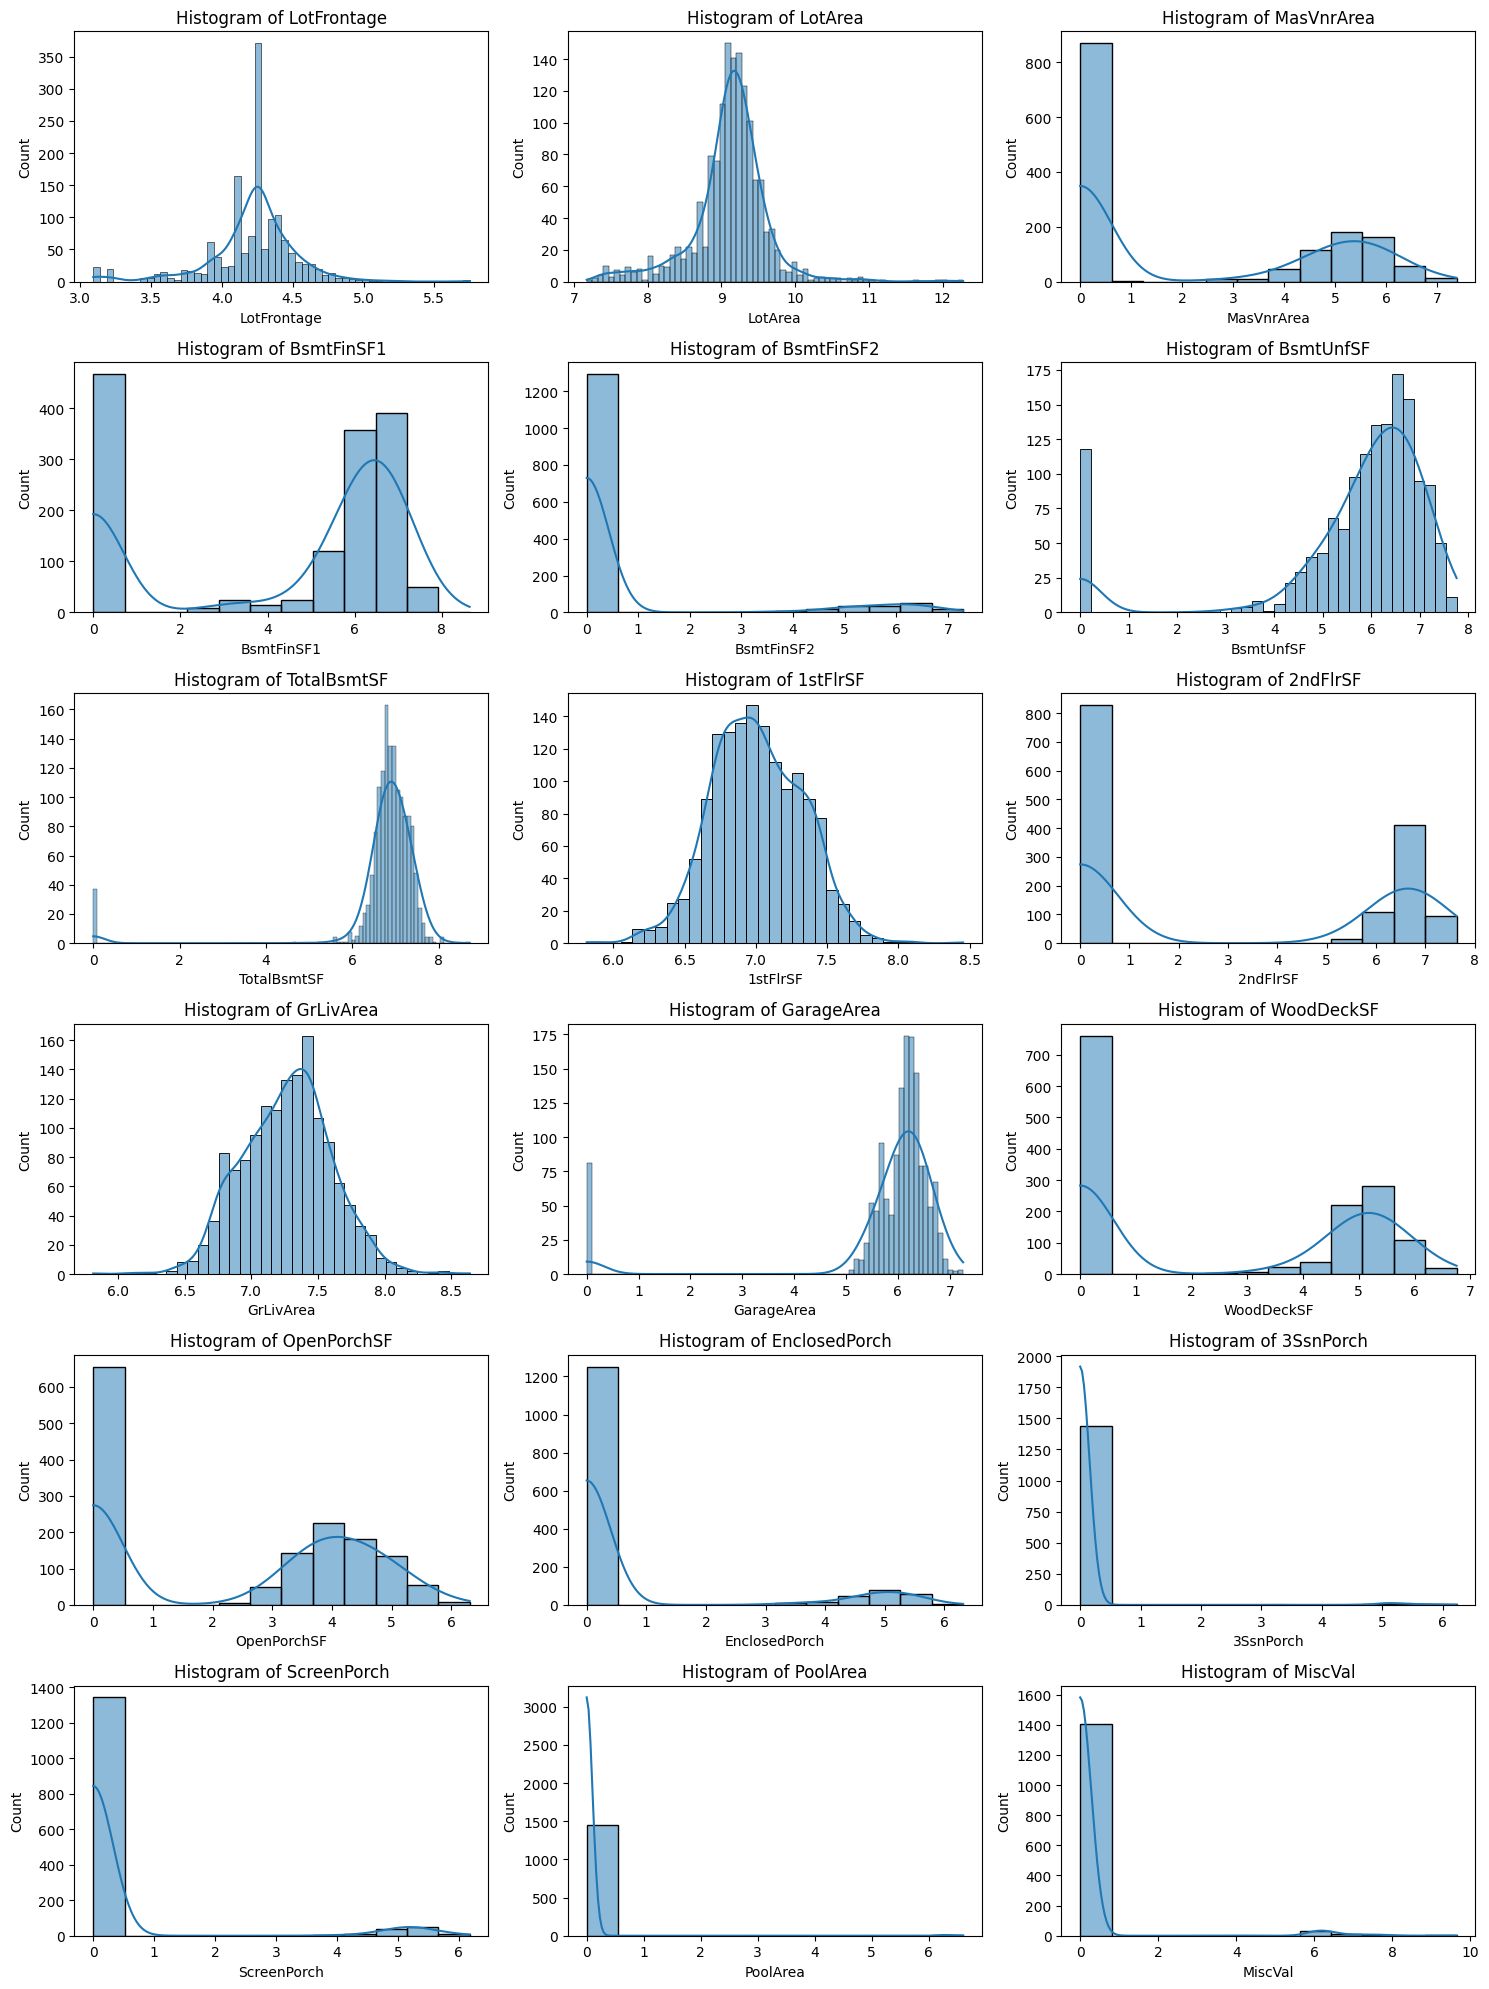

In [153]:

plt.figure(figsize=(15, 20))

for i, col in enumerate(log_cols): 
    plt.subplot(6,3,i+1)
    sns.histplot(df_train[col], kde=True)

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Encoding

In [154]:
x_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

x_test = df_test.copy()


In [155]:
ordinal_cols = [
    'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'FireplaceQu',
    'GarageQual', 'GarageCond'
]


In [156]:
for col in ordinal_cols : 
    print(f"{col} contant : ")
    print(df_train[col].value_counts())
    print('-----'*10)

ExterQual contant : 
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
--------------------------------------------------
ExterCond contant : 
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
--------------------------------------------------
BsmtQual contant : 
BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: count, dtype: int64
--------------------------------------------------
BsmtCond contant : 
BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: count, dtype: int64
--------------------------------------------------
BsmtExposure contant : 
BsmtExposure
No      953
Av      221
Gd      134
Mn      114
None     38
Name: count, dtype: int64
--------------------------------------------------
BsmtFinType1 contant : 
BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: count, dtype: int64
-------------------------------

In [157]:
qual_map = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}


In [158]:
bsmt_exp_map = {
    'None': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}

In [159]:
bsmt_fin_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

In [160]:
for col in ordinal_cols:
    if col in x_train.columns:
        if col in ['BsmtExposure']:
            x_train[col] = x_train[col].map(bsmt_exp_map)
            x_test[col]  = x_test[col].map(bsmt_exp_map)
        elif col in ['BsmtFinType1', 'BsmtFinType2']:
            x_train[col] = x_train[col].map(bsmt_fin_map)
            x_test[col]  = x_test[col].map(bsmt_fin_map)
        else:
            x_train[col] = x_train[col].map(qual_map)
            x_test[col]  = x_test[col].map(qual_map)


In [161]:
x_train[ordinal_cols].head(15)

ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0           4          3         4         3             1             6   
1           3          3         4         3             4             5   
2           4          3         4         3             2             6   
3           3          3         3         4             1             5   
4           4          3         4         3             3             6   
5           3          3         4         3             1             6   
6           4          3         5         3             3             6   
7           3          3         4         3             2             5   
8           3          3         3         3             1             1   
9           3          3         3         3             1             6   
10          3          3         3         3             1             3   
11          5          3         5         3             1             6   
12          3          3         3         3             1             5   
13          4          3         4         3             3             1   
14          3          3         3         3             1             4   

    BsmtFinType2  HeatingQC  KitchenQual  FireplaceQu  GarageQual  GarageCond  
0              1          5            4            0           3           3  
1              1          5            3            3           3           3  
2              1          5            4            3           3           3  
3              1          4            4            4           3           3  
4              1          5            4            3           3           3  
5              1          5            3            0           3           3  
6              1          5            4            4           3           3  
7              4          5            3            3           3           3  
8              1          4            3            3           2           3  
9              1          5            3            3           4           3  
10             1          5            3            0           3           3  
11             1          5            5            4           3           3  
12             1          3            3            0           3           3  
13             1          5            4            4           3           3  
14             1          3            3            2           3           3

In [162]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [163]:
cat_cols = [
    col for col in categorical_cols 
    if col not in ordinal_cols
]


In [164]:
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True, dtype=int)
x_test  = pd.get_dummies(x_test,  columns=cat_cols, drop_first=True, dtype=int)


In [165]:
x_train, x_test = x_train.align(
    x_test, join='left', axis=1, fill_value=0
)


In [166]:
len(x_train.columns)

218

In [167]:
cols_to_keep = [col for col in x_train.columns if col not in ordinal_cols]

x_train[cols_to_keep]

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0        1          60     4.189655  9.042040            7            5   
1        2          20     4.394449  9.169623            6            8   
2        3          60     4.234107  9.328212            7            5   
3        4          70     4.110874  9.164401            7            5   
4        5          60     4.442651  9.565284            8            5   
...    ...         ...          ...       ...          ...          ...   
1455  1456          60     4.143135  8.976894            6            5   
1456  1457          20     4.454347  9.486152            6            6   
1457  1458          70     4.204693  9.109746            7            9   
1458  1459          20     4.234107  9.181735            5            6   
1459  1460          20     4.330733  9.204121            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0          2003          2003    5.283204    6.561031  ...               0   
1          1976          1976    0.000000    6.886532  ...               0   
2          2001          2002    5.093750    6.188264  ...               0   
3          1915          1970    0.000000    5.379897  ...               0   
4          2000          2000    5.860786    6.486161  ...               0   
...         ...           ...         ...         ...  ...             ...   
1455       1999          2000    0.000000    0.000000  ...               0   
1456       1978          1988    4.787492    6.673298  ...               0   
1457       1941          2006    0.000000    5.620401  ...               0   
1458       1950          1996    0.000000    3.912023  ...               0   
1459       1965          1965    0.000000    6.722630  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1                      0  
1457                

In [168]:
x_train = x_train.drop('Id', axis=1)
x_test  = x_test.drop('Id', axis=1)


## Modeling

In [215]:
#from sklearn.model_selection import train_test_split

In [216]:
#from sklearn.linear_model import LinearRegression , Lasso , Ridge
#from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , VotingRegressor
#from sklearn.model_selection import GridSearchCV , cross_val_score
#from sklearn.metrics import mean_squared_error , make_scorer


In [170]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42 )

### Linear Regression

In [172]:
lr = LinearRegression()
lr.fit(x_tr, y_tr)

LinearRegression()

In [173]:
y_pred = lr.predict(x_val)

In [174]:
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred))

rmse_lr

0.1572741839868889

### Ridge Regression

In [175]:
ridge = Ridge(alpha=10)
ridge.fit(x_tr, y_tr)

Ridge(alpha=10)

In [176]:
y_pred = ridge.predict(x_val)

In [177]:
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_ridge

0.13194991333048095

### Lasso 

In [178]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_tr, y_tr)

Lasso(alpha=0.001)

In [179]:
y_pred = lasso.predict(x_val)

In [180]:
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_lasso

0.13381176725979238

In [181]:
print("Linear RMSE:", rmse_lr)
print("Ridge  RMSE:", rmse_ridge)
print("Lasso  RMSE:", rmse_lasso)


Linear RMSE: 0.1572741839868889
Ridge  RMSE: 0.13194991333048095
Lasso  RMSE: 0.13381176725979238


### Random Forest

In [182]:
rf = RandomForestRegressor( n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(x_tr, y_tr)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [183]:
y_pred = rf.predict(x_val)

In [184]:
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_rf

0.14742318769822602

### Gradient Boosting ( XGBoost , LightGBM )

In [185]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_tr, y_tr)

GradientBoostingRegressor(random_state=42)

In [186]:
y_pred = gbr.predict(x_val)

In [187]:
rmse_gbr = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_gbr

0.13526613017096378

In [188]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'RandomForest', 'GradientBoost'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf, rmse_gbr]
})

results

Model      RMSE
0         Linear  0.157274
1          Ridge  0.131950
2          Lasso  0.133812
3   RandomForest  0.147423
4  GradientBoost  0.135266

In [190]:
results.sort_values('RMSE')

Model      RMSE
1          Ridge  0.131950
2          Lasso  0.133812
4  GradientBoost  0.135266
3   RandomForest  0.147423
0         Linear  0.157274

### Tuning To Ridge

In [194]:
ridge = Ridge()

param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10, 20, 50, 100]
}

rmse_scorer = make_scorer(
    mean_squared_error,
    squared=False
)

grid_ridge = GridSearchCV(
    ridge,
    param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=1
)

grid_ridge.fit(x_train, y_train)

grid_ridge.best_params_, grid_ridge.best_score_

C:\Users\Administrator\anaconda3\envs\projenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\projenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\projenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\projenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in versio

({'alpha': 0.1}, 0.14037239074610527)

In [195]:
best_ridge = grid_ridge.best_estimator_
best_ridge.fit(x_tr, y_tr)

Ridge(alpha=0.1)

In [196]:
y_pred = best_ridge.predict(x_val)

In [197]:
rmse_ridge_tuned = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_ridge_tuned

0.1338821626941663

### Tuning To Gradient Boosting

In [198]:

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

grid_gbr = GridSearchCV(
    gbr,
    param_grid,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

grid_gbr.fit(x_train, y_train)

grid_gbr.best_params_, grid_gbr.best_score_


({'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 200},
 0.14087906566765826)

In [199]:
best_gbr = grid_gbr.best_estimator_

best_gbr.fit(x_tr, y_tr)
y_pred = best_gbr.predict(x_val)

rmse_gbr_tuned = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_gbr_tuned


0.1516410622818206

### Ensemble

In [200]:
y_pred_ridge = best_ridge.predict(x_val)
y_pred_gbr   = best_gbr.predict(x_val)

y_pred_ens = (y_pred_ridge + y_pred_gbr) / 2

rmse_ensemble = np.sqrt(mean_squared_error(y_val, y_pred_ens))
rmse_ensemble


0.13220461676444217

In [201]:
results = pd.DataFrame({
    'Model': ['Ridge Tuned', 'GBR Tuned', 'Ensemble'],
    'RMSE': [rmse_ridge_tuned, rmse_gbr_tuned, rmse_ensemble]
})

results

Model      RMSE
0  Ridge Tuned  0.133882
1    GBR Tuned  0.151641
2     Ensemble  0.132205

In [202]:
results.sort_values('RMSE')

Model      RMSE
2     Ensemble  0.132205
0  Ridge Tuned  0.133882
1    GBR Tuned  0.151641

### VotingRegressor & cross_val_score

In [204]:
ensemble = VotingRegressor(
    estimators=[
        ('ridge', best_ridge),
        ('gbr', best_gbr)
    ]
)

scores = cross_val_score(
    ensemble,
    x_train,
    y_train,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=-1
)

print("RMSE per fold:", scores)
print("Mean RMSE:", scores.mean())

RMSE per fold: [0.11604266 0.13531495 0.13233526 0.1165166  0.13846419]
Mean RMSE: 0.12773473174465452


##  Final Model Training & Submission

In [205]:
ensemble.fit(x_train, y_train)


VotingRegressor(estimators=[('ridge', Ridge(alpha=0.1)),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.03,
                                                       max_depth=2,
                                                       n_estimators=200,
                                                       random_state=42))])

In [206]:
x_test.isnull().sum()[x_test.isnull().sum() > 0]


Series([], dtype: int64)

In [207]:
test_preds = ensemble.predict(x_test)


In [208]:
test_preds = np.expm1(test_preds)

In [211]:
test_ids = df_test['Id'] 


In [212]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})


In [213]:
submission.to_csv("submission.csv", index=False)
